# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
model_f03

['aim_face_03',
 'cas_face_03',
 'covsal_face_03',
 'gbvs_face_03',
 'icf_face_03',
 'ik_face_03',
 'sun_face_03']

## Get the NSS scores

In [8]:
nss_table = summary[:,:,0]
nss_f03_table = summary_f03[:,:,0]
nss_f05_table = summary_f05[:,:,0]
nss_f07_table = summary_f07[:,:,0]

## Change scores into DataFrames

In [9]:
NSS = pd.DataFrame(data=nss_table, columns=model, index=context)
NSS.columns.name='models'
NSS.index.name='context'

NSS = NSS.transpose()
NSS

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.695415,0.750022,0.606893,0.634023,0.612062,0.904362
cas,0.699232,0.751214,0.614966,0.598501,0.602891,0.916443
covsal,0.808601,0.858434,0.727820,0.799353,0.676901,0.994663
gbvs,0.930722,0.981991,0.847613,0.866363,0.818153,1.175780
icf,0.750453,0.798573,0.672449,0.703392,0.680108,0.827598
ik,0.609094,0.656248,0.532654,0.570222,0.548264,0.825519
sun,0.381636,0.374716,0.392854,0.231857,0.342912,0.381378
dg,1.007740,1.091062,0.872670,1.028912,0.857675,1.201838
faces,0.948514,0.945107,1.282341,1.248569,0.946717,0.878707


In [10]:
faces = NSS.loc['faces']
NSS = NSS.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg']]

In [11]:
NSS_f03 = pd.DataFrame(data=nss_f03_table, columns=model_f03, index=context_f03)
NSS_f03.columns.name='models'
NSS_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
NSS_f03 = NSS_f03.rename(index=str, columns=col).transpose()

NSS_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.726771,0.802703,0.603681,0.646115,0.665118,0.927426
cas,0.724031,0.794266,0.609574,0.608964,0.641751,0.933882
covsal,0.844614,0.915541,0.729637,0.814085,0.733162,1.021776
gbvs,0.952308,1.017286,0.846974,0.877877,0.851408,1.190304
icf,0.776991,0.841105,0.673060,0.717625,0.714424,0.848944
ik,0.644718,0.714655,0.531347,0.582755,0.604659,0.849906
sun,0.427048,0.450776,0.388583,0.244370,0.416806,0.412040


In [12]:
NSS_f05 = pd.DataFrame(data=nss_f05_table, columns=model_f05, index=context_f05)
NSS_f05.columns.name='models'
NSS_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
NSS_f05 = NSS_f05.rename(index=str, columns=col).transpose()

NSS_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.751993,0.843119,0.604273,0.655431,0.702635,0.946604
cas,0.749544,0.834213,0.612289,0.620550,0.683569,0.948357
covsal,0.871282,0.957498,0.731522,0.826974,0.773809,1.043873
gbvs,0.969970,1.045364,0.847754,0.887882,0.877220,1.199123
icf,0.794886,0.869942,0.673215,0.727519,0.735561,0.859675
ik,0.672653,0.759661,0.531609,0.593539,0.646299,0.865729
sun,0.466713,0.514570,0.389136,0.263813,0.473598,0.446995


In [13]:
NSS_f07 = pd.DataFrame(data=nss_f07_table, columns=model_f07, index=context_f07)
NSS_f07.columns.name='models'
NSS_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
NSS_f07 = NSS_f07.rename(index=str, columns=col).transpose()

NSS_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.765826,0.865497,0.604252,0.656729,0.719146,0.954633
cas,0.771458,0.869309,0.612838,0.629839,0.715841,0.957294
covsal,0.882585,0.975002,0.732773,0.834294,0.790723,1.055998
gbvs,0.979199,1.059780,0.848574,0.896216,0.890499,1.195571
icf,0.803146,0.883573,0.672770,0.732652,0.741859,0.858524
ik,0.689479,0.787104,0.531223,0.601158,0.667458,0.872764
sun,0.496638,0.563304,0.388569,0.282352,0.512007,0.480026


## Vizualization

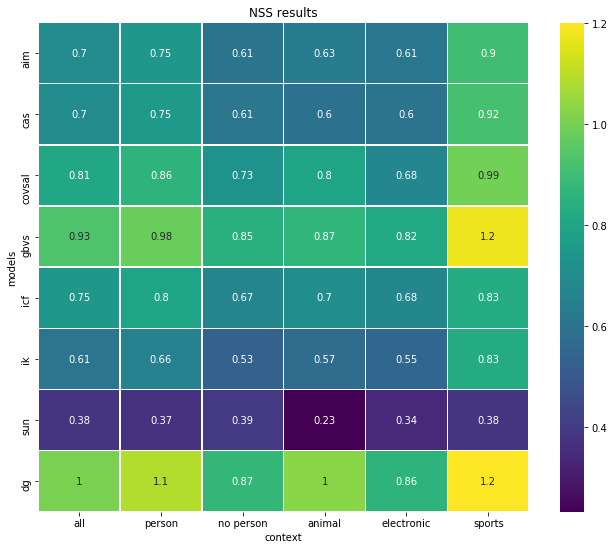

In [75]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('NSS results');
plt.savefig('plots/NSS_all.jpg', bbox_inches='tight', pad_inches=0)

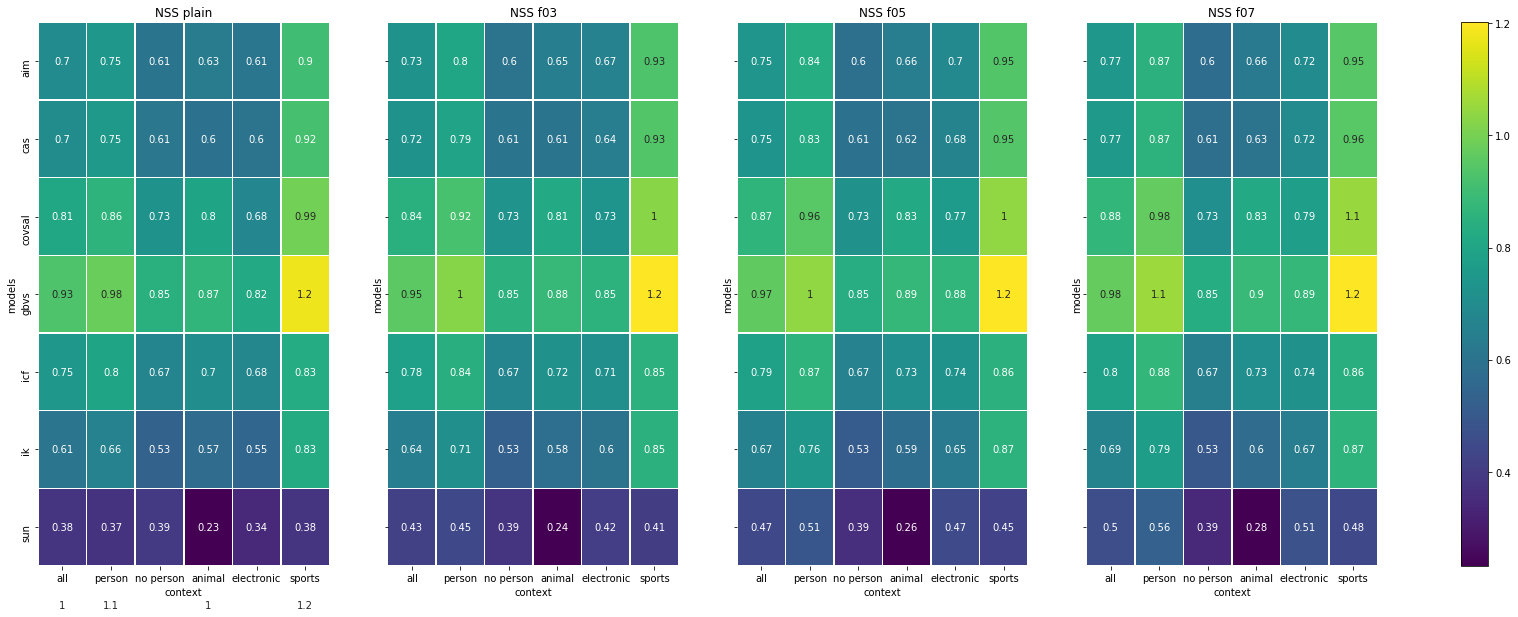

In [33]:
fig, ax = plt.subplots(1, 4,figsize=(30,10), sharex=True, sharey=True)

im = sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(NSS_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(NSS_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(NSS_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('NSS plain');
ax[1].set_title('NSS f03');
ax[2].set_title('NSS f05');
ax[3].set_title('NSS f07');
# plt.savefig('plots/nss_sep.jpg', bbox_inches='tight', pad_inches=0)

### Calculate the relative error

In [16]:
NSS0 = NSS.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

In [17]:
NSS_diff_f03 = ((NSS_f03 - NSS0) / NSS0)*100
NSS_diff_f05 = ((NSS_f05 - NSS0) / NSS0)*100
NSS_diff_f07 = ((NSS_f07 - NSS0) / NSS0)*100

In [18]:
# fig, ax = plt.subplots(1, 3,figsize=(20,4), sharex=True, sharey=True)

# im = sns.heatmap(NSS_diff_f03, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
# sns.heatmap(NSS_diff_f05, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
# sns.heatmap(NSS_diff_f07, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);

# mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax);

# ax[0].set_title('NSS rel err f03');
# ax[1].set_title('NSS rel err f05');
# ax[2].set_title('NSS rel err f07');
# plt.savefig('plots/nss_sep_diff.jpg', bbox_inches='tight', pad_inches=0)

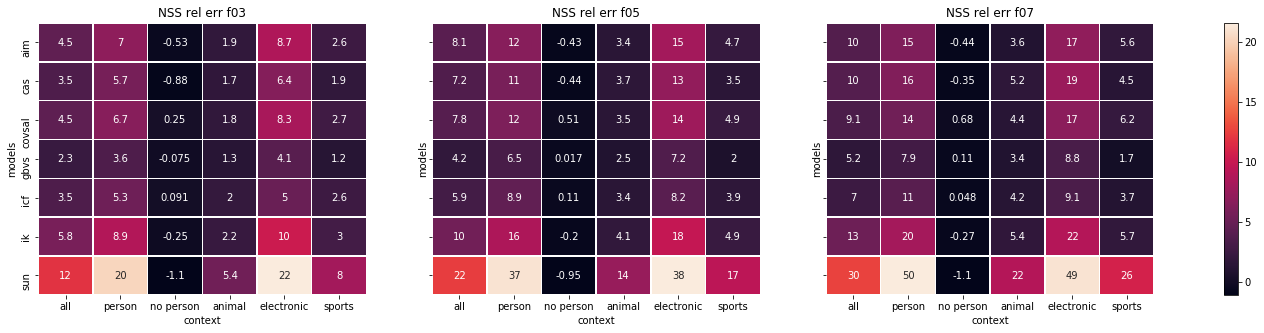

In [34]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(NSS_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(NSS_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(NSS_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('NSS rel err f03');
ax[1].set_title('NSS rel err f05');
ax[2].set_title('NSS rel err f07');
# plt.savefig('plots/nss_sep_diff.jpg', bbox_inches='tight', pad_inches=0)

### "Zoom in"

In [20]:
aim_nss_f03 = NSS_diff_f03.transpose()['aim']
aim_nss_f05 = NSS_diff_f05.transpose()['aim']
aim_nss_f07 = NSS_diff_f07.transpose()['aim']

In [21]:
df = pd.DataFrame([aim_nss_f03, aim_nss_f05, aim_nss_f07], index=[3,5,7])
df = df.transpose()

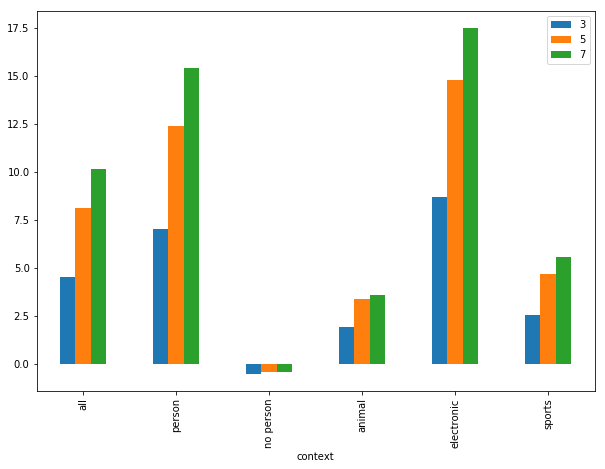

In [35]:
fig, ax = plt.subplots(figsize=(10, 7));
df.plot.bar(ax=ax);
# plt.savefig('plots/nss_aim_relerr_all.jpg', bbox_inches='tight', pad_inches=0)

Text(0, 0.5, 'NSS')

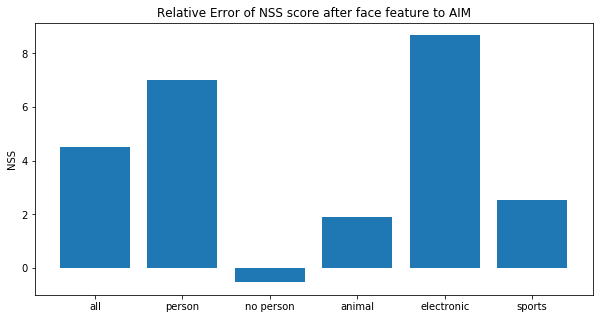

In [36]:
plt.subplots(1,1,figsize=(10,5))
plt.bar(aim_nss_f03.index, aim_nss_f03.values);
plt.title('Relative Error of NSS score after face feature to AIM');
plt.ylabel('NSS')
# plt.savefig('plots/nss_aim_relerr.jpg', bbox_inches='tight', pad_inches=0)

### "Zoom in"

In [24]:
gbvs_nss_f03 = NSS_diff_f03.transpose()['gbvs']
gbvs_nss_f05 = NSS_diff_f05.transpose()['gbvs']
gbvs_nss_f07 = NSS_diff_f07.transpose()['gbvs']

In [25]:
df_gbvs = pd.DataFrame([gbvs_nss_f03, gbvs_nss_f05, gbvs_nss_f07], index=[3,5,7])
df_gbvs = df_gbvs.transpose()

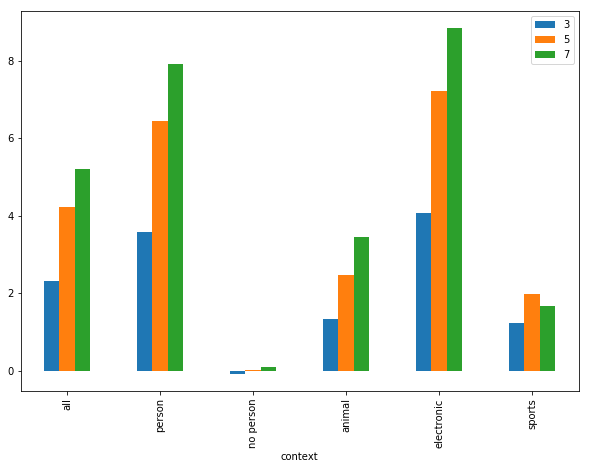

In [37]:
fig, ax = plt.subplots(figsize=(10, 7));
df_gbvs.plot.bar(ax=ax);
# plt.savefig('plots/nss_gbvs_relerr_all.jpg', bbox_inches='tight', pad_inches=0)

### Comparison between deepgaze and the best GBVS

In [27]:
gbvs_f07 = NSS_f07.transpose()['gbvs']
gbvs = NSS.transpose()['gbvs']

In [28]:
dg = NSS.transpose()['dg']
dg

context
all           1.007740
person        1.091062
no person     0.872670
animal        1.028912
electronic    0.857675
sports        1.201838
Name: dg, dtype: float64

In [29]:
df_comp = pd.DataFrame([gbvs, gbvs_f07,dg], index=['gbvs', 'gbvs_f07', 'dg'])
df_comp = df_comp.transpose()

In [39]:
# fig, ax = plt.subplots(figsize=(10, 7));
# df_comp.plot.bar(ax=ax);
# # plt.savefig('plots/nss_gbvs_vs_dg.jpg', bbox_inches='tight', pad_inches=0)

In [66]:
# fig, ax = plt.subplots(figsize=(10, 7));
# df_comp.plot(ax=ax);

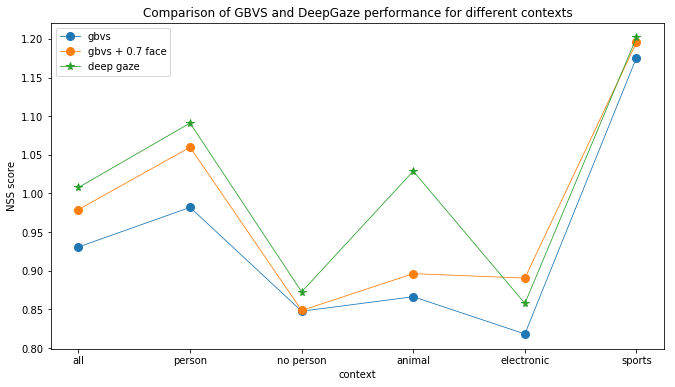

In [74]:
t = np.arange(0,6)
d = 0.8
m = 8

plt.subplots(figsize=(11,6))
plt.plot(gbvs, '-o', label='gbvs', linewidth=d, markersize=m);
plt.plot(gbvs_f07, '-o', label='gbvs + 0.7 face', linewidth=d, markersize=m);
plt.plot(dg, '-*', label='deep gaze', linewidth=d, markersize=m)

plt.ylabel('NSS score')
plt.xlabel('context')
plt.title('Comparison of GBVS and DeepGaze performance for different contexts')
plt.legend();

plt.savefig('plots/NSS_gbvs_performance.jpg', bbox_inches='tight', pad_inches=0)